# **Práctica 2: Análisis exploratorio de datos**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com

# Contexto

Datos recopilados de manera diaria a nivel país sobre la vacunación contra COVID-19.

**Objetivo:** Hacer un análisis exploratorio de datos sobre el progreso mundial y en México de vacunación contra COVID-19.

## Importar las bibliotecas y los datos

### Variables

1. País: Nombre del país.
2. Código ISO: Código ISO del país.
3. Fecha: Fecha de registro.
4. Total de vacunaciones: Número total de vacunaciones en el país.
5. Total de personas vacunadas: Una persona, según el esquema de inmunización, recibirá una o más vacunas (normalmente 2).
6. Total de personas completamente vacunadas: Número de personas que recibieron el esquema completo de vacunación.
7. Vacunas diarias (crudos): Número de vacunaciones para esa fecha/país.
8. Vacunas diarias: Número de vacunaciones para esa fecha/país.
9. Total de vacunaciones por cien: Relación (en porcentaje) entre el número de vacunaciones y la población total hasta la fecha.
10. Total de personas vacunadas por cien: Relación (en porcentaje) entre la población inmunizada y la población total hasta la fecha.
11. Total de personas totalmente vacunadas por cien: Relación (en porcentaje) entre la población totalmente inmunizada y la población total hasta la fecha en el país.
13. Vacunas diarias por millón: Relación (en ppm) entre el número de vacunaciones y la población total para la fecha actual en el país.
14. Vacunas utilizadas en el país: Nombre de las vacunas utilizadas en el país (hasta la fecha).
15. Nombre de la fuente: Fuente de la información.
16. Sitio web de origen: Fuente de información.

In [2]:
import pandas as pd                     # Para la manipulación y análisis de datos
import numpy as np                      # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt         # Para la generación de gráficas a partir de los datos
import seaborn as sns                   # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar imágenes dentro del cuaderno

In [3]:
DatosVacunacion = pd.read_csv("https://raw.githubusercontent.com/OscarCasasolaGarcia/Practicas/master/1EDA/country_vaccinations.csv")
DatosVacunacion

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77704,Zimbabwe,ZWE,2022-02-12,7753490.0,4316135.0,3346568.0,7774.0,8741.0,51.37,28.60,22.17,579.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77705,Zimbabwe,ZWE,2022-02-13,7757768.0,4318075.0,3348299.0,4278.0,8749.0,51.40,28.61,22.19,580.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77706,Zimbabwe,ZWE,2022-02-14,7764290.0,4319919.0,3350481.0,6522.0,8748.0,51.45,28.62,22.20,580.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77707,Zimbabwe,ZWE,2022-02-15,7771022.0,4322787.0,3352751.0,6732.0,8662.0,51.49,28.64,22.22,574.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
DatosVacunacion.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
77704,Zimbabwe,ZWE,2022-02-12,7753490.0,4316135.0,3346568.0,7774.0,8741.0,51.37,28.60,22.17,579.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77705,Zimbabwe,ZWE,2022-02-13,7757768.0,4318075.0,3348299.0,4278.0,8749.0,51.40,28.61,22.19,580.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77706,Zimbabwe,ZWE,2022-02-14,7764290.0,4319919.0,3350481.0,6522.0,8748.0,51.45,28.62,22.20,580.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77707,Zimbabwe,ZWE,2022-02-15,7771022.0,4322787.0,3352751.0,6732.0,8662.0,51.49,28.64,22.22,574.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
77708,Zimbabwe,ZWE,2022-02-16,7782961.0,4327084.0,3357098.0,11939.0,8399.0,51.57,28.67,22.24,557.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


# Paso 1: Descripción de la estructura de los datos

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [6]:
DatosVacunacion.shape

(77709, 15)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [7]:
DatosVacunacion.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante).

# Paso 2: Identificación de datos faltantes

Una función útil de pandas es .isnull().sum() que regresa la suma de todos los valores nulos en cada variable.

In [8]:
DatosVacunacion.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     37661
people_vaccinated                      39764
people_fully_vaccinated                42244
daily_vaccinations_raw                 45118
daily_vaccinations                       280
total_vaccinations_per_hundred         37661
people_vaccinated_per_hundred          39764
people_fully_vaccinated_per_hundred    42244
daily_vaccinations_per_million           280
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [9]:
DatosVacunacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77709 entries, 0 to 77708
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              77709 non-null  object 
 1   iso_code                             77709 non-null  object 
 2   date                                 77709 non-null  object 
 3   total_vaccinations                   40048 non-null  float64
 4   people_vaccinated                    37945 non-null  float64
 5   people_fully_vaccinated              35465 non-null  float64
 6   daily_vaccinations_raw               32591 non-null  float64
 7   daily_vaccinations                   77429 non-null  float64
 8   total_vaccinations_per_hundred       40048 non-null  float64
 9   people_vaccinated_per_hundred        37945 non-null  float64
 10  people_fully_vaccinated_per_hundred  35465 non-null  float64
 11  daily_vaccinations_per_milli

# Paso 3: Detección de valores atípicos

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea hist() para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: figsize y xrot para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

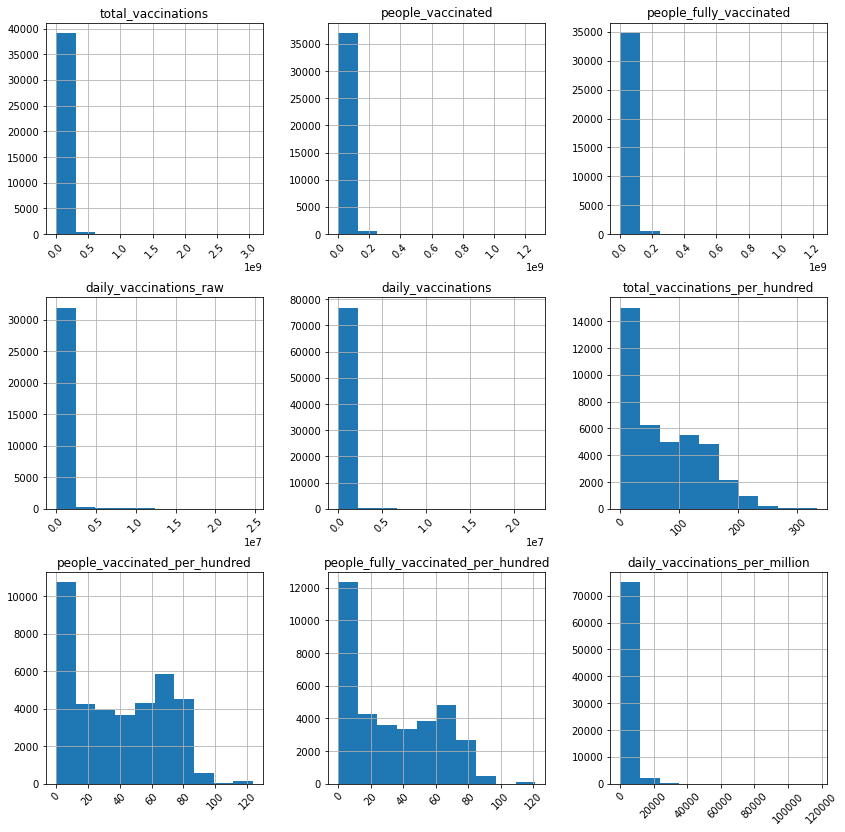

In [10]:
DatosVacunacion.hist(figsize=(14,14), xrot=45)
plt.show()

In [22]:
DatosVacunacion[DatosVacunacion.country == 'Mexico']


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
44768,Mexico,MEX,2020-12-24,2924.0,2924.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
44769,Mexico,MEX,2020-12-25,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
44770,Mexico,MEX,2020-12-26,NaN,NaN,NaN,NaN,1300.0,NaN,NaN,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
44771,Mexico,MEX,2020-12-27,6824.0,6824.0,NaN,NaN,1300.0,0.01,0.01,NaN,10.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
44772,Mexico,MEX,2020-12-28,9579.0,9579.0,NaN,2755.0,1664.0,0.01,0.01,NaN,13.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45183,Mexico,MEX,2022-02-12,172046323.0,84064526.0,77885188.0,592569.0,423504.0,132.08,64.53,59.79,3251.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
45184,Mexico,MEX,2022-02-13,172480864.0,84097727.0,77924179.0,434541.0,407567.0,132.41,64.56,59.82,3129.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
45185,Mexico,MEX,2022-02-14,172673715.0,84112878.0,77952732.0,192851.0,427489.0,132.56,64.57,59.84,3282.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
45186,Mexico,MEX,2022-02-15,173037874.0,84765334.0,78499390.0,364159.0,460366.0,132.84,65.07,60.26,3534.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


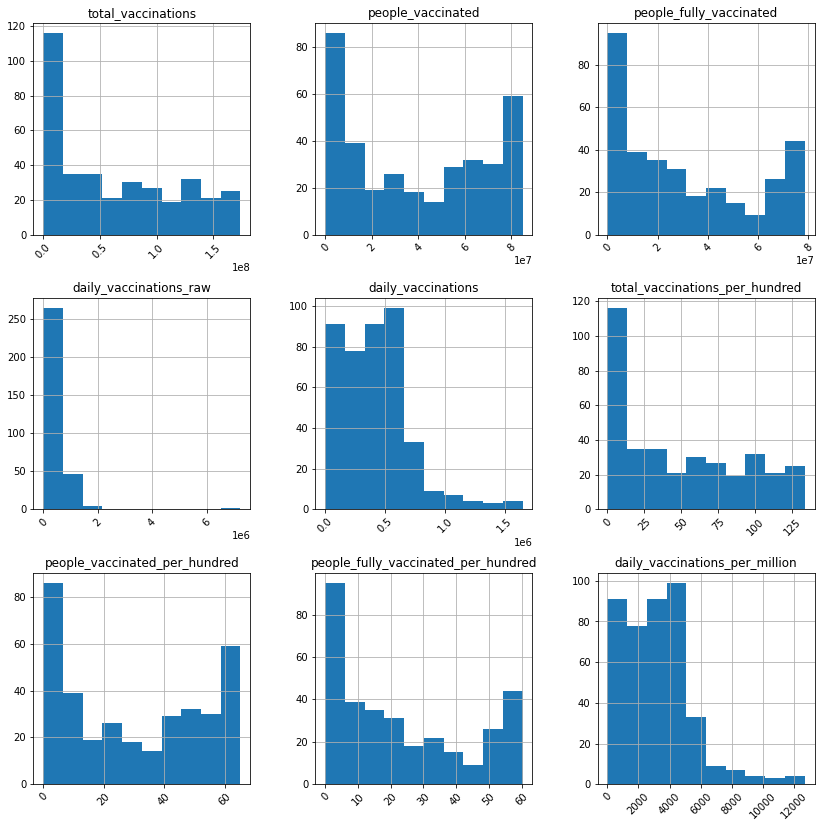

In [12]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.

* Límites que no tienen sentido, como valores porcentuales > 100.
* Se sugiere quitar la variable: total_vaccinations_per_hundred.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando describe() que muestra un resumen estadístico de las variables numéricas.

In [13]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.610000e+02,3.520000e+02,3.340000e+02,3.180000e+02,4.190000e+02,361.000000,352.000000,334.000000,419.000000
mean,6.312366e+07,3.932007e+07,3.017572e+07,4.431414e+05,4.112672e+05,48.458947,30.185455,23.165359,3157.217184
std,5.593993e+07,3.061532e+07,2.674850e+07,6.305156e+05,2.972282e+05,42.944174,23.503036,20.534355,2281.745765
min,2.924000e+03,2.924000e+03,1.958000e+03,0.000000e+00,1.300000e+03,0.000000,0.000000,0.000000,10.000000
25%,8.644446e+06,9.377838e+06,4.629287e+06,1.348690e+05,1.862860e+05,6.640000,7.202500,3.550000,1430.000000
50%,4.985702e+07,3.597939e+07,2.245211e+07,3.557615e+05,4.139270e+05,38.270000,27.620000,17.235000,3178.000000
75%,1.079217e+08,6.824424e+07,5.240372e+07,5.987792e+05,5.622330e+05,82.850000,52.390000,40.227500,4316.000000
max,1.738265e+08,8.478251e+07,7.852846e+07,7.246123e+06,1.648223e+06,133.440000,65.090000,60.280000,12653.000000


Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).

Por defecto, el percentil 50 es lo mismo que la mediana.

3)   Diagramas para detectar posibles valores atípicos

Para este tipo de gráficos se utiliza Seaborn, que permite generar diagramas de cajas para detectar valores atípicos.

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


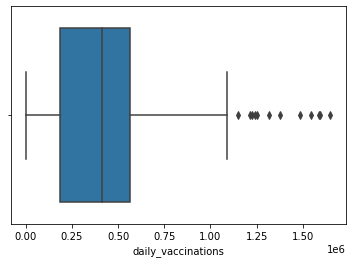

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


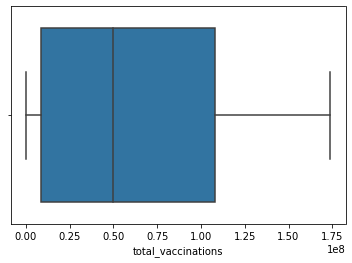

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


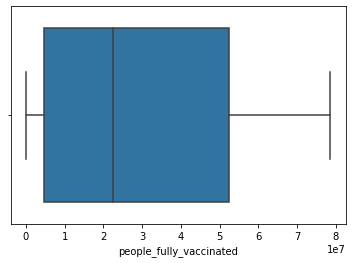

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


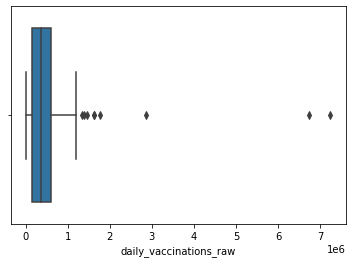

In [14]:
VariablesValoresAtipicos = ['daily_vaccinations', 'total_vaccinations', 'people_fully_vaccinated', 'daily_vaccinations_raw']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=DatosVacunacion[DatosVacunacion.country == 'Mexico'])
  plt.show()

#En Daily Vaccinations se observan valores atípicos, pero pasa por las fechas de vacunaciones, las cuales no eran constantes.
#No se ponen las demás variables porque son variables calculadas a partir de las que se presentan a continuación. 


4) Distribución de variables categóricas

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [15]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].describe(include='object')

,country,iso_code,date,vaccines,source_name,source_website
count,420,420,420,420,420,420
unique,1,1,420,1,1,1
top,Mexico,MEX,2020-12-24,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
freq,420,420,1,420,420,420


Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.

**Plot**



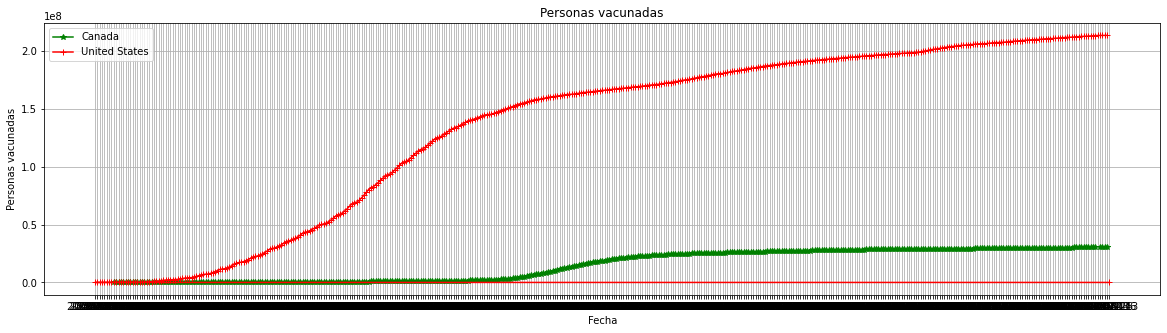

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(DatosVacunacion[DatosVacunacion.country == 'Canada']['date'], 
         DatosVacunacion[DatosVacunacion.country == 'Canada']['people_fully_vaccinated'], color='green', marker='*', label='Canada')
plt.plot(DatosVacunacion[DatosVacunacion.country == 'United States']['date'], 
         DatosVacunacion[DatosVacunacion.country == 'United States']['people_fully_vaccinated'], color='red', marker='+', label='United States')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')
plt.title('Personas vacunadas')
plt.grid(True)
plt.legend()
plt.show()

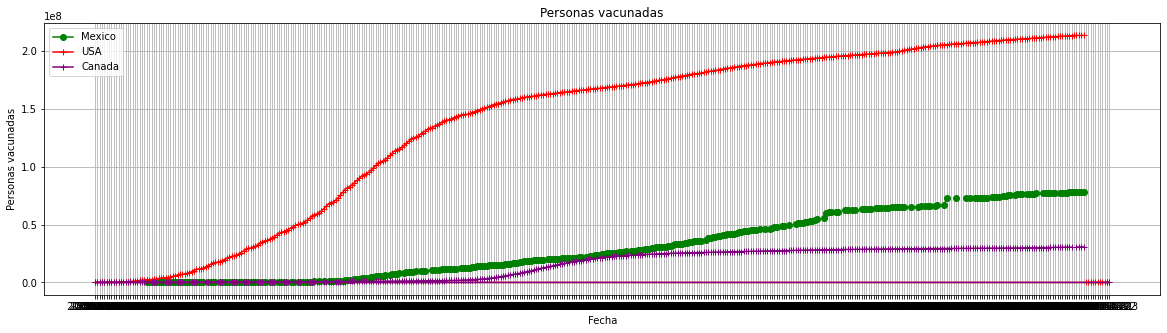

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(DatosVacunacion[DatosVacunacion.country == 'Mexico']['date'], 
        DatosVacunacion[DatosVacunacion.country == 'Mexico']['people_fully_vaccinated'], color='green', marker='o', label='Mexico')
plt.plot(DatosVacunacion[DatosVacunacion.country == 'United States']['date'], 
        DatosVacunacion[DatosVacunacion.country == 'United States']['people_fully_vaccinated'], color='red', marker='+', label='USA')
plt.plot(DatosVacunacion[DatosVacunacion.country == 'Canada']['date'], 
        DatosVacunacion[DatosVacunacion.country == 'Canada']['people_fully_vaccinated'], color='purple', marker='+', label='Canada')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')
plt.title('Personas vacunadas')
plt.grid(True)
plt.legend()
plt.show()


# Paso 4: Identificación de relaciones entre pares variables

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [18]:
DatosVacunacion[DatosVacunacion.country == 'Mexico'].corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.986744,0.995763,0.303737,0.483504,1.000000,0.986744,0.995763,0.483504
people_vaccinated,0.986744,1.000000,0.973495,0.321683,0.532892,0.986744,1.000000,0.973498,0.532892
people_fully_vaccinated,0.995763,0.973495,1.000000,0.262629,0.384686,0.995764,0.973496,1.000000,0.384686
daily_vaccinations_raw,0.303737,0.321683,0.262629,1.000000,0.618454,0.303737,0.321679,0.262638,0.618451
daily_vaccinations,0.483504,0.532892,0.384686,0.618454,1.000000,0.483501,0.532891,0.384690,1.000000
total_vaccinations_per_hundred,1.000000,0.986744,0.995764,0.303737,0.483501,1.000000,0.986744,0.995764,0.483501
people_vaccinated_per_hundred,0.986744,1.000000,0.973496,0.321679,0.532891,0.986744,1.000000,0.973499,0.532891
people_fully_vaccinated_per_hundred,0.995763,0.973498,1.000000,0.262638,0.384690,0.995764,0.973499,1.000000,0.384689
daily_vaccinations_per_million,0.483504,0.532892,0.384686,0.618451,1.000000,0.483501,0.532891,0.384689,1.000000


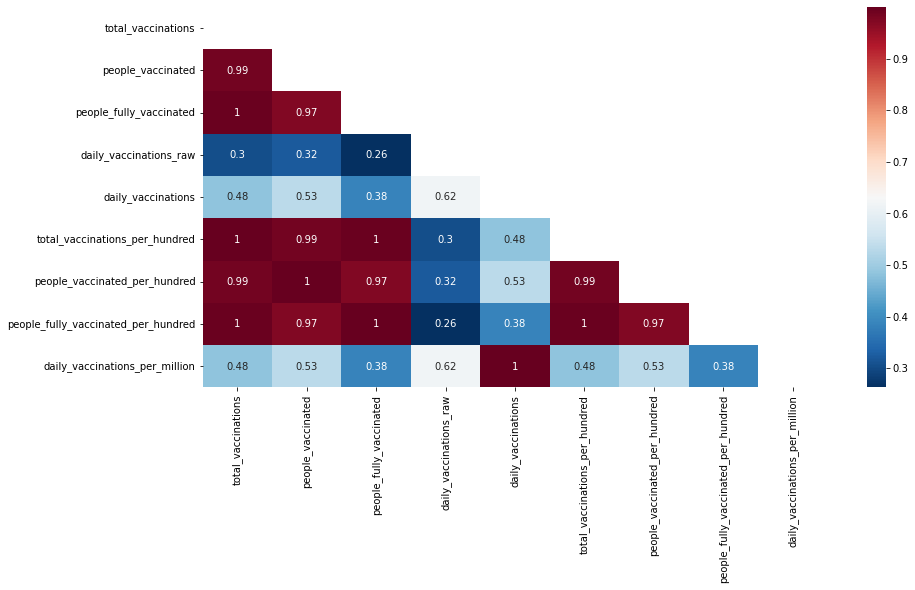

In [20]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosVacunacion[DatosVacunacion.country == 'Mexico'].corr())
sns.heatmap(DatosVacunacion[DatosVacunacion.country == 'Mexico'].corr(), 
            cmap='RdBu_r', 
            annot=True, 
            mask=MatrizInf)
plt.show()